# This notebook compares the V15 and V20 prediction errors for different bitstrings/categories

### Load the data

In [1]:
import pandas as pd
df = pd.read_pickle('tmp_data/clean_yearly_data.pkl')

### Create a plotting function

In [2]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    ax.scatter(-180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.

    #ax.scatter(180,0,c='k')

    #ax.set_xlim(-180,180)
    
    
    
    
    
    #Extra circles
    row = df.sort_values(by=['delta'],ascending=False).iloc[0:ncircles]
    xsel = row['latitude_ERA']
    ysel = row['longitude_ERA']
    
    sc_extra = ax.scatter(ysel,xsel,transform=ccrs.PlateCarree(),
                          s=200, facecolors='none', edgecolors='C2',lw=2
                          )

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

## Lake

,latitude_ERA,longitude_ERA,delta,deltaX
16641,-21.779853,-52.148148,8.565804,0.532623
38233,-2.388758,-54.562500,5.517063,-1.018029
71529,24.028095,69.000000,5.123649,6.272882
101086,41.170945,-113.400000,4.876928,2.530676
89090,34.145187,6.080000,2.532175,0.257852
24181,-15.316154,127.968750,2.315439,3.142792
38369,-2.388758,36.000000,1.922324,2.163942


-0.3766717

1650

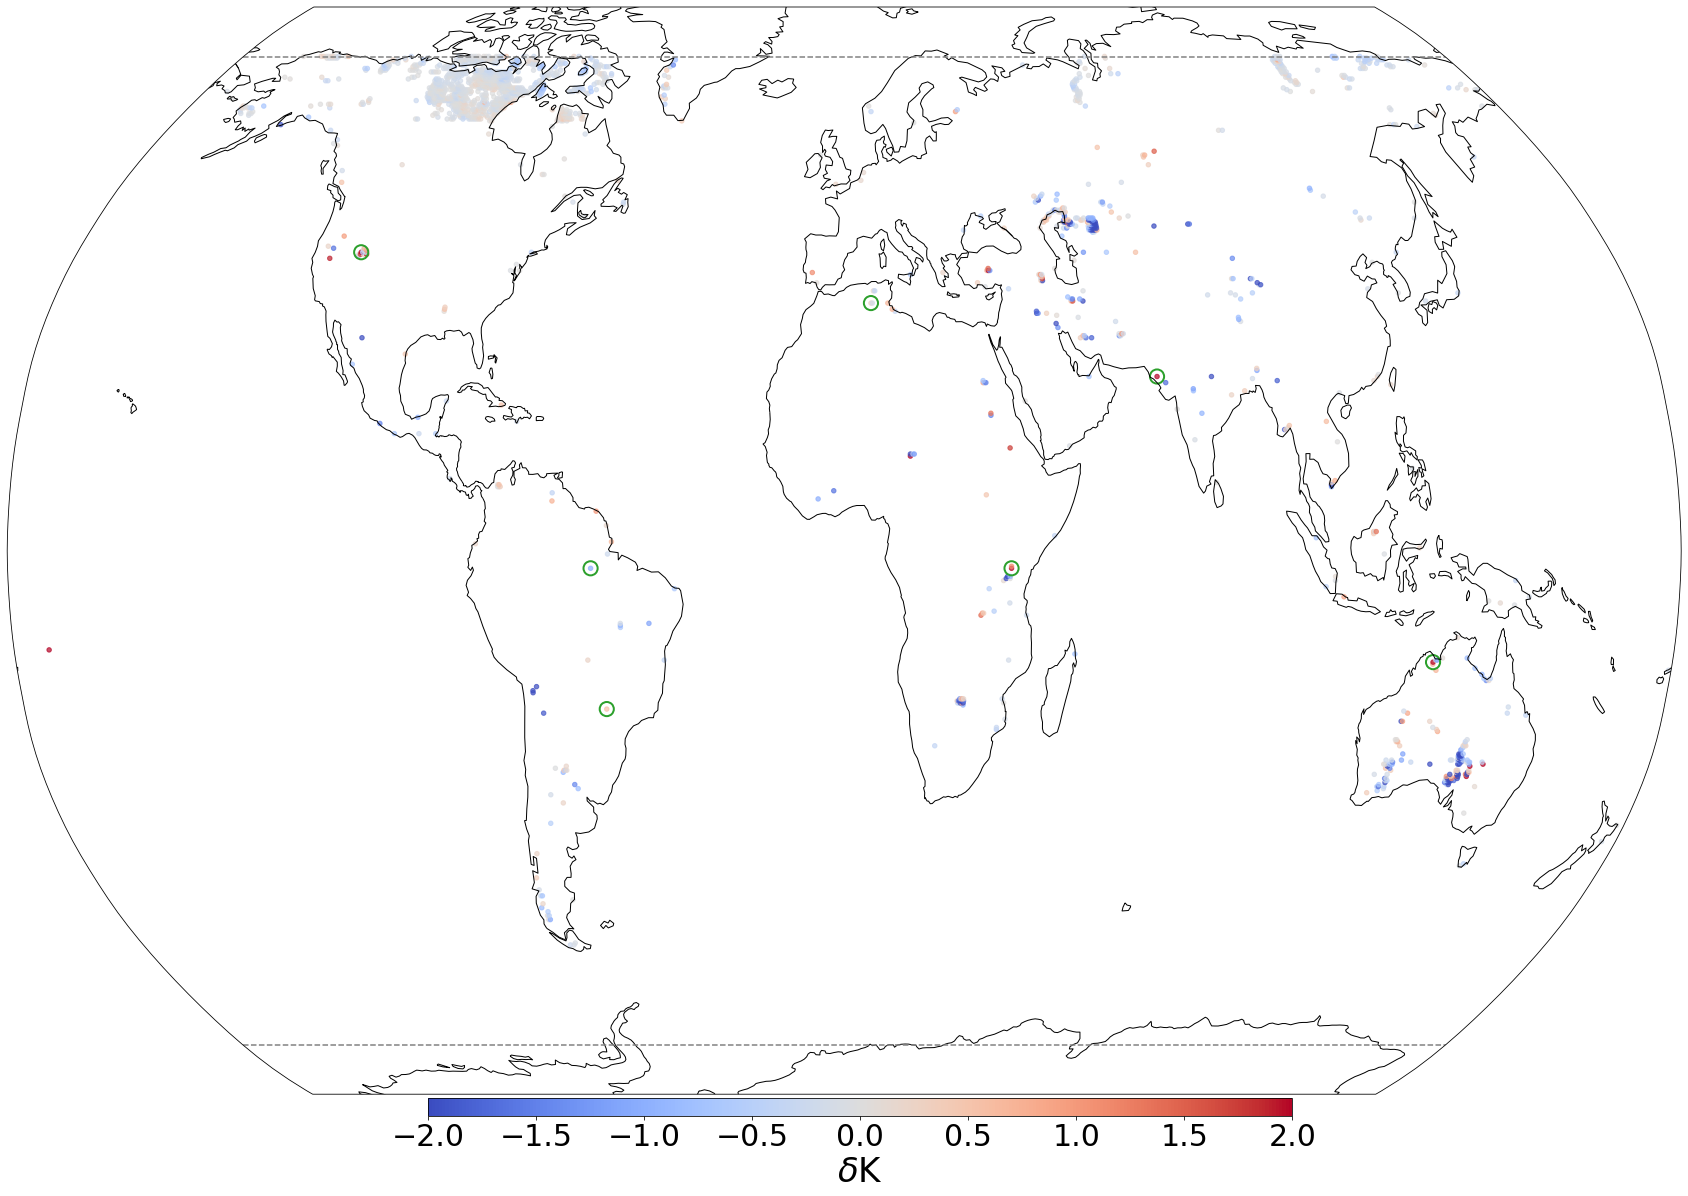

In [13]:
df_lake = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant')

n = 7
RobinsonPlot(df_lake,'deltaX',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig='figs/lakeX.png',ncircles=n)
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta','deltaX']])
display(df_lake.deltaX.mean())
display(len(df_lake))







#6 = Lake Natron

#IMPROVES
#0 = Brazil 1, south
#1 = Brazil 2, north
#3 = SLC
#4 = Chott Melrhir


#DOES NOT IMPOVE
#2 = Gujarat
#5 = Australia

,latitude_ERA,longitude_ERA,delta
71529,24.028095,69.000000,5.123649
8977,-29.648702,140.000000,0.087896
101086,41.170945,-113.400000,4.876928
96896,38.641672,33.398438,0.912580
55695,13.067912,14.343750,-1.166672
100584,40.889915,-113.400000,1.885526
94971,37.517551,45.666667,0.117006


-0.77033347

546

latitude_ERA                      24.028095
longitude_ERA                          69.0
MODIS_LST                        313.732483
V15_prediction                   309.048828
V20_prediction                   303.119598
V20X_prediction                  301.872253
V15_error                           5.62142
V20_error                          10.74507
V20X_error                        11.894302
delta                              5.123649
deltaX                             6.272882
V15_clFr                            0.59056
V15_cvhFr                               0.0
V15_cvlFr                               0.0
V15_dl                             2.580078
V15_oceanFr                             0.0
V15_si10Fr                              0.0
V15_z                             23.542847
V20_clFr                           0.711941
V20_cvhFr                               0.0
V20_cvlFr                               0.0
V20_dl                             3.755859
V20_oceanFr                     

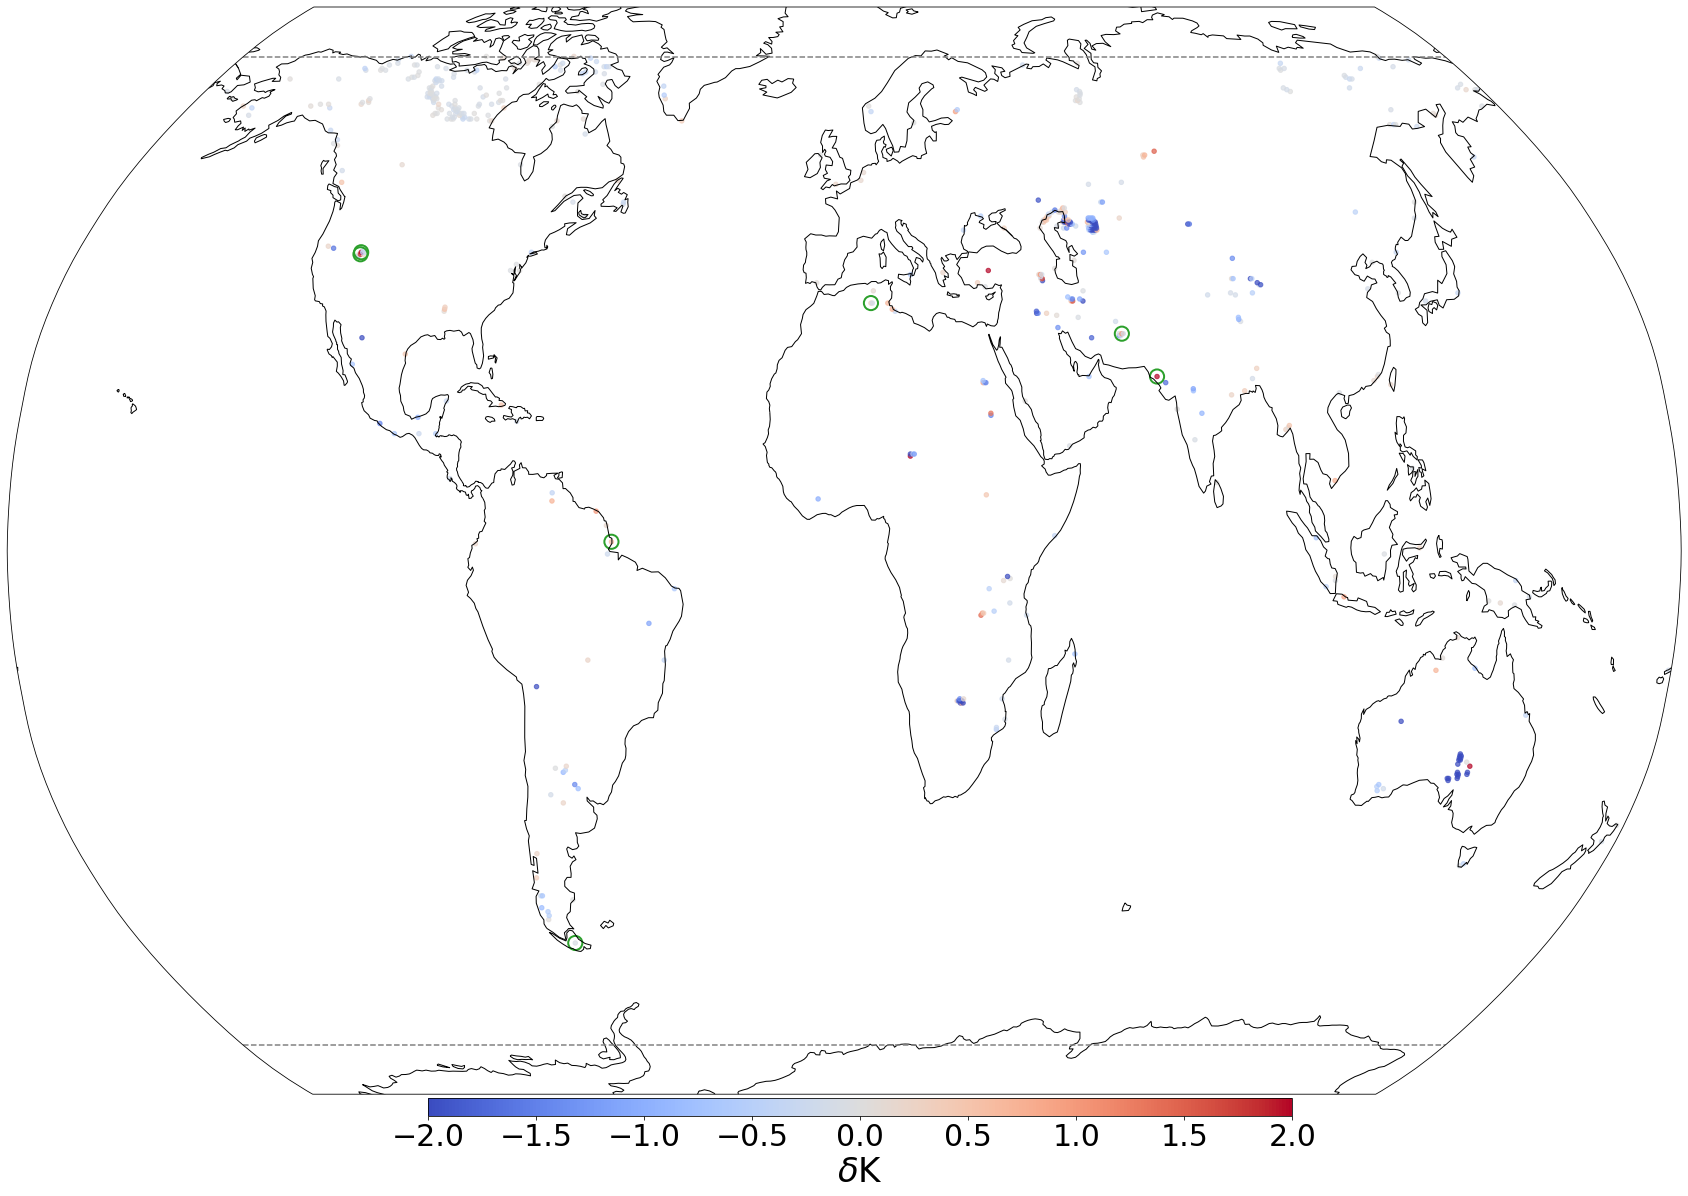

In [14]:
#df_lake2 = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant')
df_lake2 = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')

n = 7
RobinsonPlot(df_lake2,'deltaX',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake2.sort_values(by=['deltaX'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake2.delta.mean())
display(len(df_lake2))
display(df_lake2.sort_values(by=['deltaX'],ascending=False).iloc[0]) #[['latitude_ERA','longitude_ERA','delta']])


## Vegetation

latitude_ERA                        1.264637
longitude_ERA                      121.21875
MODIS_LST                         301.398285
V15_prediction                    303.127594
V20_prediction                    317.944916
V20X_prediction                   307.073761
V15_error                           2.319744
V20_error                          16.546648
V20X_error                          5.695025
delta                              14.226904
deltaX                              3.375281
V15_clFr                                 0.0
V15_cvhFr                           0.297639
V15_cvlFr                           0.069996
V15_dl                                  25.0
V15_oceanFr                          0.46731
V15_si10Fr                               0.0
V15_z                            1237.730347
V20_clFr                            0.001231
V20_cvhFr                                0.0
V20_cvlFr                                0.0
V20_dl                              451.6123
V20_oceanF

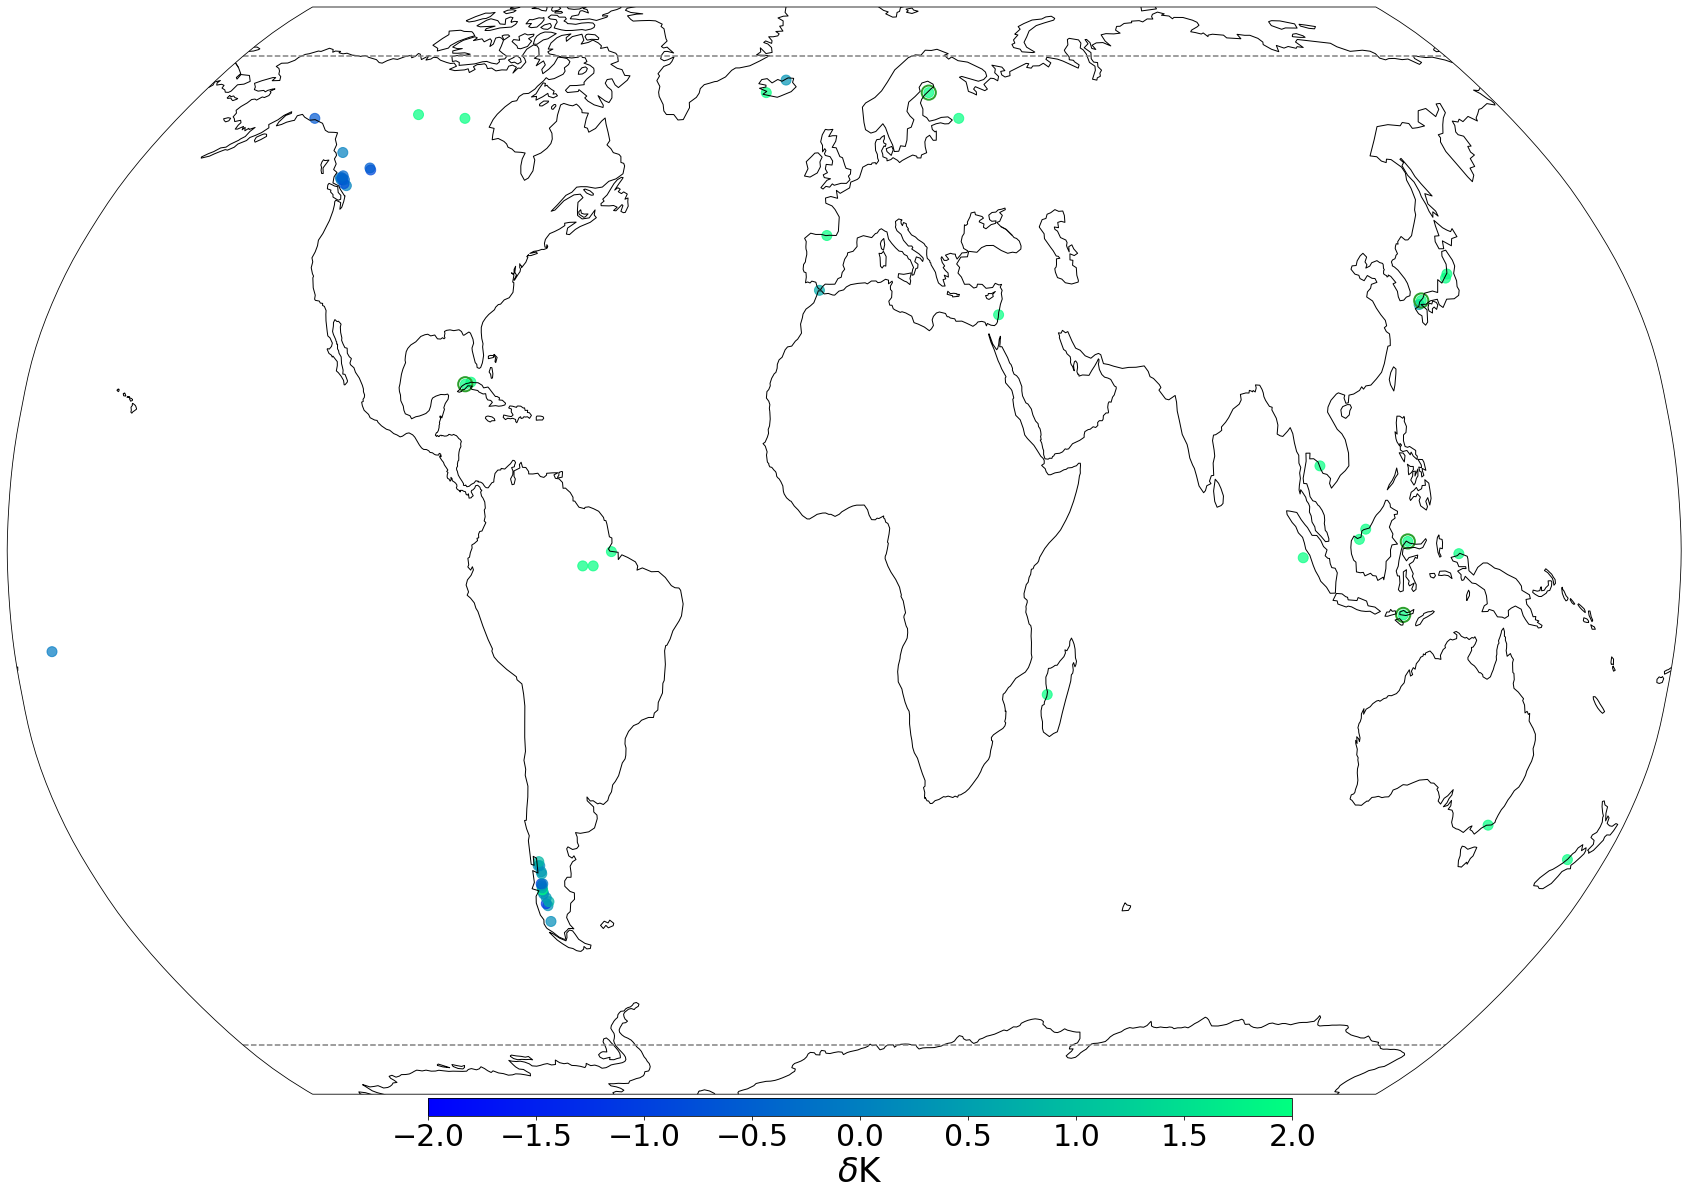

In [58]:
df_veg = df.query('cvhFr_change_is_significant & not clFr_change_is_significant')

n = 5
RobinsonPlot(df_veg,'delta',vmin=-2,vmax=+2,cmap=plt.cm.winter,markersize = 100,savefig=None,ncircles=n)
#RobinsonPlot(df_veg,'deltaX',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)

df_veg.sort_values(by=['delta'],ascending=False).iloc[0]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])
# display(df_veg.deltaX.mean())
# display(df_veg.delta.mean())
# i = 5
# display(row.iloc[i].latitude_ERA)
# display(row.iloc[i].longitude_ERA)

In [59]:
row = df_veg.sort_values(by=['delta'],ascending=False).iloc[0]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])


In [60]:
row.latitude_ERA

1.2646366169457137

In [61]:
row.longitude_ERA

121.21875

## Ice

,latitude_ERA,longitude_ERA,delta,deltaX
133962,59.999970,-141.866667,4.654447,-1.450924
2659,-49.320823,69.166667,3.111953,1.938502
145090,66.744690,-65.333333,2.798009,0.191082
89231,34.145187,76.480000,2.705089,2.408566
2131,-65.058510,-60.000000,2.208425,1.883096


-0.12768228

-0.2624511

latitude_ERA                        59.99997
longitude_ERA                    -141.866667
MODIS_LST                         271.977448
V15_prediction                    277.694244
V20_prediction                    261.428802
V20X_prediction                   275.110748
V15_error                           6.214495
V20_error                          10.868941
V20X_error                          4.763571
delta                               4.654447
deltaX                             -1.450924
V15_clFr                                 0.0
V15_cvhFr                                0.0
V15_cvlFr                                0.0
V15_dl                             38.737305
V15_oceanFr                         0.561608
V15_si10Fr                          0.072272
V15_z                            3214.988281
V20_clFr                             0.00121
V20_cvhFr                                0.0
V20_cvlFr                                0.0
V20_dl                            108.524414
V20_oceanF

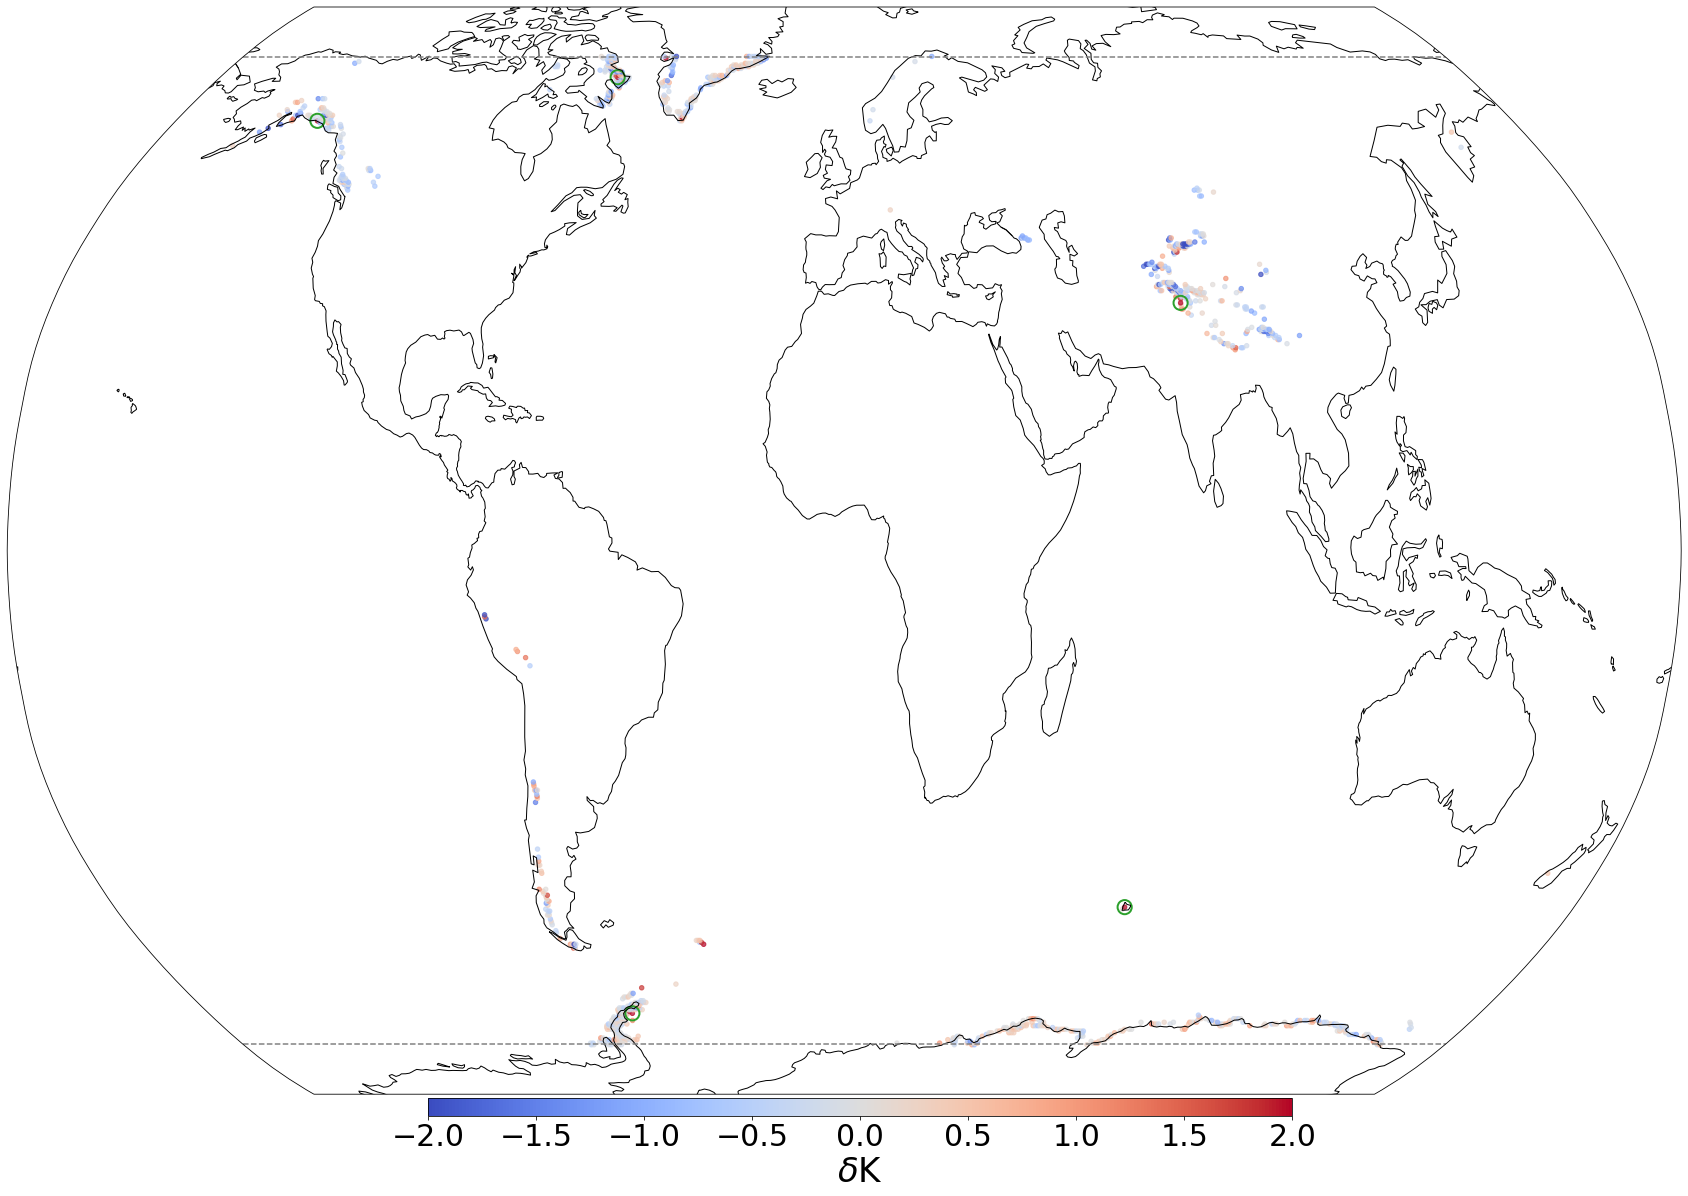

In [34]:
df_ice = df.query('si10Fr_change_is_significant ')
n = 5
RobinsonPlot(df_ice,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta','deltaX']])
display(df_ice.delta.mean())
display(df_ice.deltaX.mean())


row = df_ice.sort_values(by=['delta'],ascending=False).iloc[0]
display(row)


In [30]:
df_ice.columns

Index(['latitude_ERA', 'longitude_ERA', 'MODIS_LST', 'V15_prediction',
       'V20_prediction', 'V20X_prediction', 'V15_error', 'V20_error',
       'V20X_error', 'delta', 'deltaX', 'V15_clFr', 'V15_cvhFr', 'V15_cvlFr',
       'V15_dl', 'V15_oceanFr', 'V15_si10Fr', 'V15_z', 'V20_clFr', 'V20_cvhFr',
       'V20_cvlFr', 'V20_dl', 'V20_oceanFr', 'V20_si10Fr', 'V20_z',
       'changeAbs_V20V15_clFr', 'changeAbs_V20V15_cvhFr',
       'changeAbs_V20V15_cvlFr', 'changeAbs_V20V15_oceanFr',
       'changeAbs_V20V15_si10Fr', 'changeAbs_V20V15_dl', 'changeAbs_V20V15_z',
       'clFr_change_is_significant', 'cvhFr_change_is_significant',
       'cvlFr_change_is_significant', 'oceanFr_change_is_significant',
       'si10Fr_change_is_significant', 'dl_change_is_significant',
       'z_change_is_significant', 'bitstring'],
      dtype='object')

# Deepdive

Now lets look at some particular points


## Deepdive - Lake bad points


In [37]:
#0 = Brazil 1, south
#1 = Brazil 2, north
#2 = Gujarat
#3 = SLC
#4 = Chott Melrhir
#5 = Australia
#6 = Lake Natron
n=0
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[n]) #[['latitude_ERA','longitude_ERA','delta']])


latitude_ERA                      -21.779853
longitude_ERA                     -52.148148
MODIS_LST                         303.927155
V15_prediction                    305.344116
V20_prediction                    314.944519
V20X_prediction                   301.372467
V15_error                           2.478057
V20_error                           11.04386
V20X_error                           3.01068
delta                               8.565804
deltaX                              0.532623
V15_clFr                            0.382812
V15_cvhFr                           0.361774
V15_cvlFr                           0.255414
V15_dl                                   8.0
V15_oceanFr                              0.0
V15_si10Fr                               0.0
V15_z                            2907.898438
V20_clFr                            0.516062
V20_cvhFr                                0.0
V20_cvlFr                                0.0
V20_dl                              9.894531
V20_oceanF

In [10]:
lat = df_lake.sort_values(by=['delta'],ascending=False).iloc[n].latitude_ERA #[['latitude_ERA','longitude_ERA','delta']])
lon = df_lake.sort_values(by=['delta'],ascending=False).iloc[n].longitude_ERA #[['latitude_ERA','longitude_ERA','delta']])


In [11]:
lat

-2.3887580539270044

In [12]:
lon

36.0

## Deepdive - Lake north



In [38]:

northern_canada = df_lake.query('-141 < longitude_ERA < -92 & 60 < latitude_ERA < 70')
lena_river = df_lake.query('119 < longitude_ERA < 136 & 62 < latitude_ERA < 74')
high_latitutde_regions = pd.concat([northern_canada,lena_river])




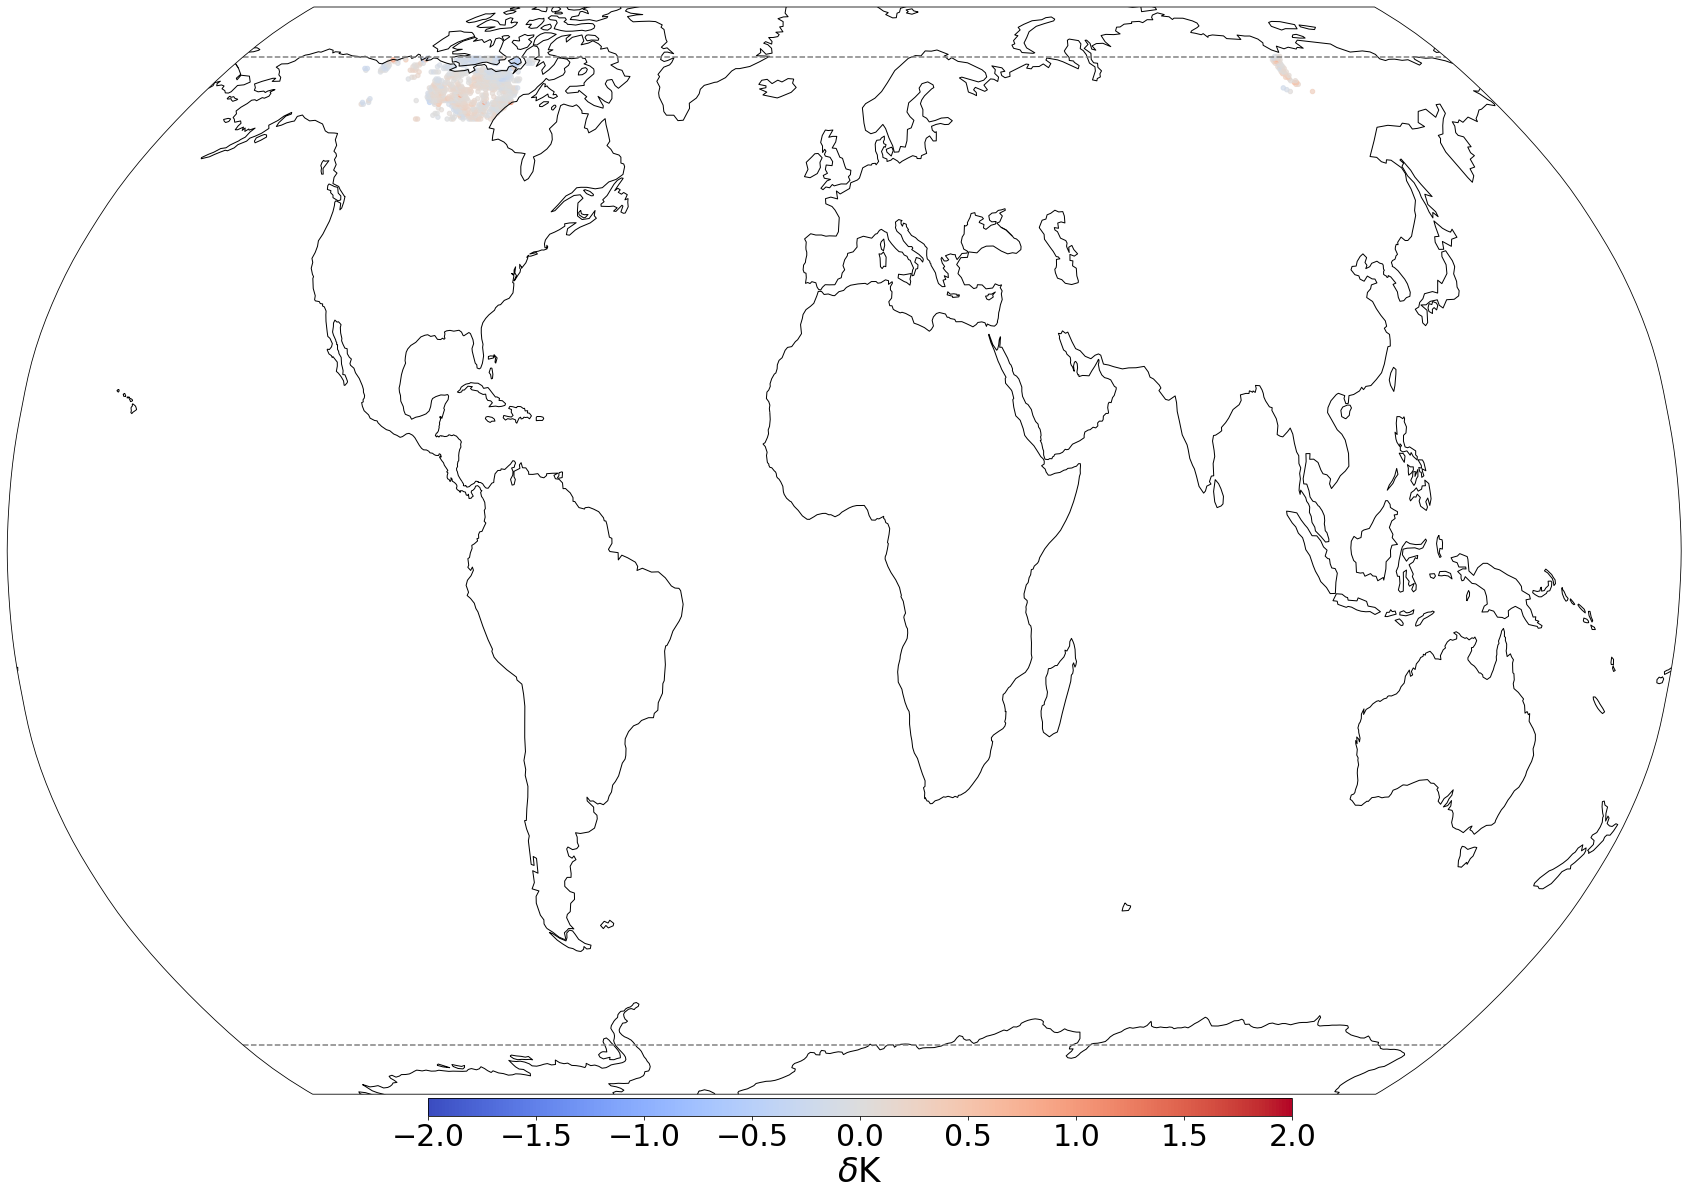

In [39]:
RobinsonPlot(high_latitutde_regions,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)


In [40]:
high_latitutde_regions.delta.mean()

0.031341072

In [41]:
high_latitutde_regions.deltaX.mean()

-0.07452752

64.2154205363026

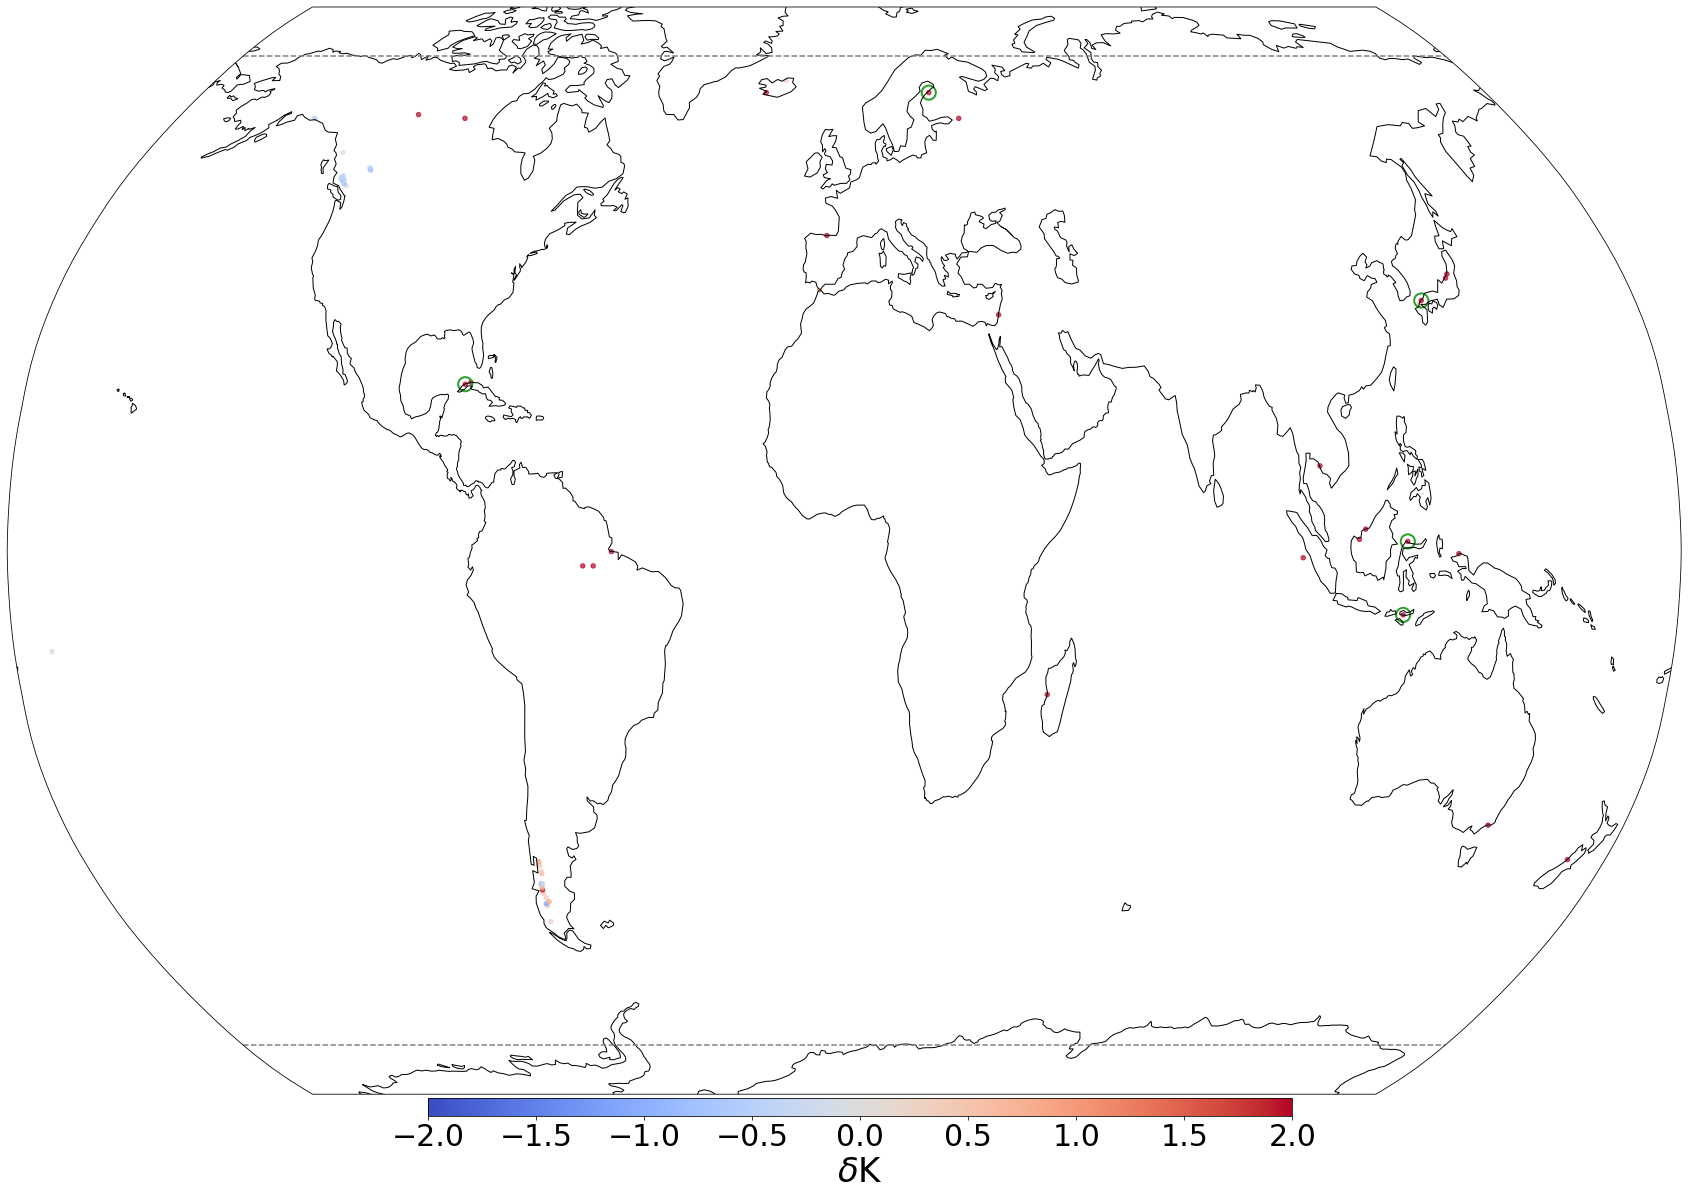

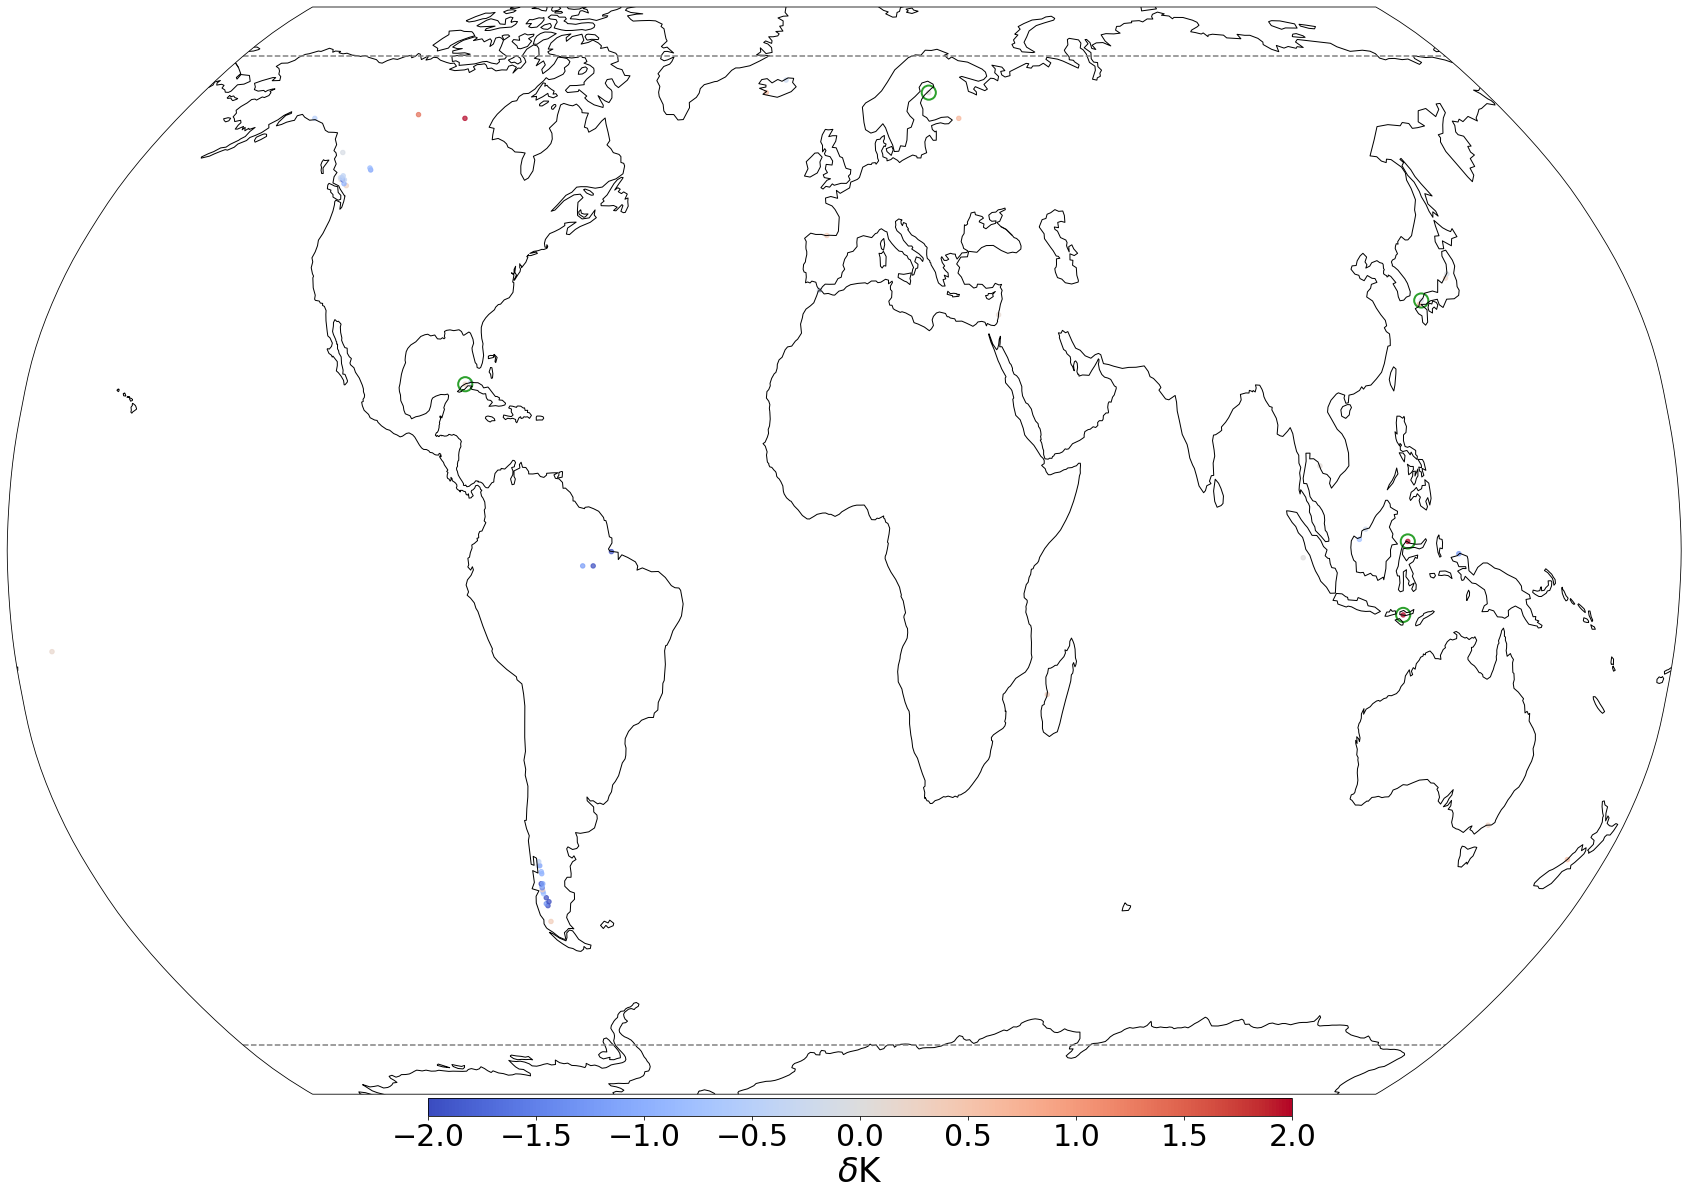

In [47]:
df_veg = df.query('cvhFr_change_is_significant & not clFr_change_is_significant')

n = 5
RobinsonPlot(df_veg,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
RobinsonPlot(df_veg,'deltaX',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)

row = df_veg.sort_values(by=['delta'],ascending=False).iloc[0:10]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])
display(row.iloc[2].latitude_ERA)
#display(df_veg.deltaX.mean())
#display(df_veg.delta.mean())
#i = 5

In [ ]:
display(row.iloc[2].longitude_ERA)
